#Insurance Price Prediction using Neural Regression:
Since, price prediction is one of the major areas where regression is heavily utilized. I have taken Insurance data from kaggle to test my neural regression model.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## One-Hot encode in pandas:
Sicne the data has string values, they need to converted into either int32 or float32 fromat before converting them into tensors. Using ``pd.get_dummies(df)``, this can be done.

In [3]:
df_oneHot = pd.get_dummies(df)
df_oneHot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


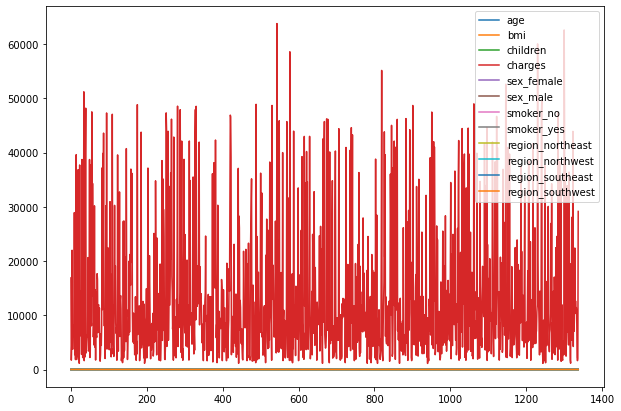

In [4]:

df_oneHot.plot(figsize =(10,7))


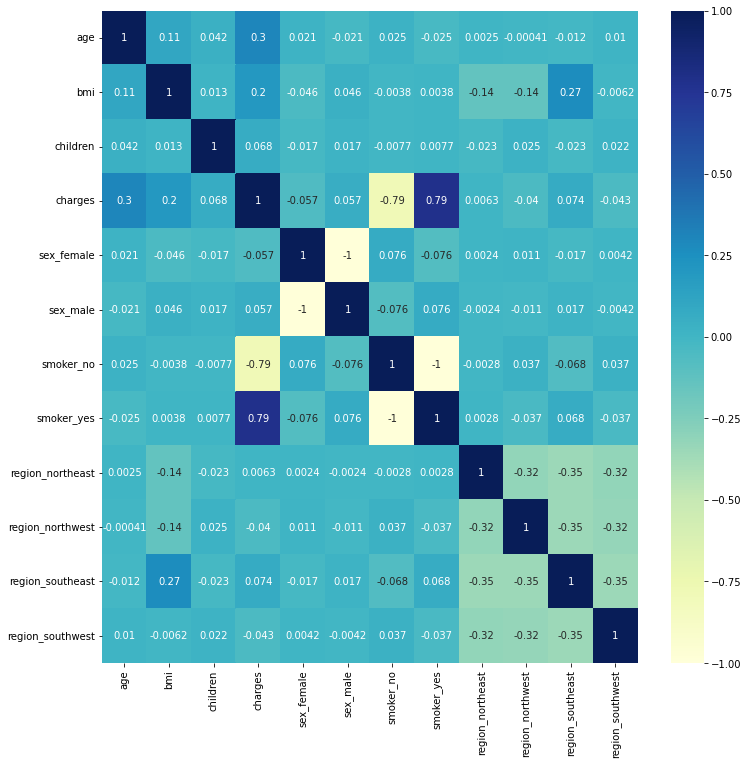

In [5]:
import seaborn as sb
plt.figure(figsize= (12,12))
dataplot = sb.heatmap(df_oneHot.corr(), cmap="YlGnBu", annot=True)
  

plt.show()

In [6]:
X = df_oneHot.drop(['charges', 'region_northeast', 'region_northwest','region_southwest'], axis = 1)
y = df_oneHot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_southeast
0,19,27.900,0,1,0,0,1,0
1,18,33.770,1,0,1,1,0,1
2,28,33.000,3,0,1,1,0,1
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
len(X), len(X_train), len(X_test), len(X_train.columns)

(1338, 1070, 268, 8)

In [8]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(8, input_shape = [8], name = 'input_layer'),
                                       tf.keras.layers.Dense(500),
                                       
                                       tf.keras.layers.Dense(500),
                                       tf.keras.layers.Dense(1, name = 'output_layer')
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                        metrics = ['mae'])

In [9]:
insurance_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 8)                 72        
                                                                 
 dense (Dense)               (None, 500)               4500      
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 output_layer (Dense)        (None, 1)                 501       
                                                                 
Total params: 255,573
Trainable params: 255,573
Non-trainable params: 0
_________________________________________________________________


In [10]:
insurance_model.fit(X_train, y_train, epochs = 1000, verbose = 0)

In [11]:
y_test.shape

(268,)

In [12]:
y_pred= insurance_model.predict(X_test)
mae_model_1 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred = tf.squeeze(y_pred) )
mae_model_1


<tf.Tensor: shape=(), dtype=float32, numpy=3181.4475>

## Standardization and Normalization:
Many machine learning and deep learning algorithms perform better or converge faster when all the features are on the similar scale or close to normally distributed.
There are two types of scalers.
1. **MinMax Scaler** - Converts the entire dependant variables between 0 to 1.
2. **Standard Scaler** - Scales the entire distribution into a normal distribution. But removes the effect of the outliers.

In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [14]:
df_pre = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi', 'children']),
    (OneHotEncoder(handle_unknown= 'ignore'), ['sex', 'smoker'])
)

X_new, y_new =  df_pre.drop(['charges', 'region'], axis = 1), df_pre['charges']

ct.fit(X_new)
X_new_normal = ct.transform(X_new)

In [16]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_normal, y_new, test_size= 0.2, random_state=42)

In [17]:
X_train_new.shape

(1070, 7)

In [18]:
tf.random.set_seed(42)

insurance_model_normal = tf.keras.Sequential([
                                       tf.keras.layers.Dense(7, input_shape = [7], name = 'input_layer'),
                                       tf.keras.layers.Dense(500),
                                       
                                       tf.keras.layers.Dense(500),
                                       tf.keras.layers.Dense(1, name = 'output_layer')
])

insurance_model_normal.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate= 0.1),
                        metrics = ['mae'])

In [19]:
insurance_model_normal.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 500)               4000      
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 output_layer (Dense)        (None, 1)                 501       
                                                                 
Total params: 255,057
Trainable params: 255,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
insurance_model_normal.fit(X_train_new, y_train_new, epochs = 1000, verbose = 1)

In [24]:
y_pred_new= insurance_model_normal.predict(X_test_new)
mae = tf.metrics.mean_absolute_error(y_true=y_test_new, y_pred = tf.squeeze(y_pred_new) )
mae.numpy()


3258.915

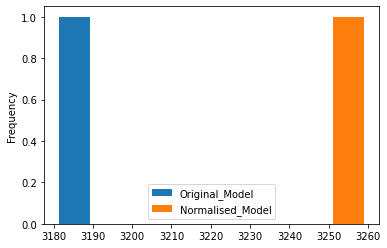

In [25]:
dic_models = {"Original_Model" : [mae_model_1.numpy()] , "Normalised_Model": [mae.numpy()]}
dic_models= pd.DataFrame.from_dict(dic_models)

dic_models.plot(kind= 'hist')



## Summary:

Normalising and scaling the columns gave a edge over the original model. But the model's accuracy hasn't been improved. Yet, I think the normalised model is being overfitted, hence if the overfitting can be reduced then the normalized data can give a better accracy.